# Język Python - Wykład 9.

## Moduły naukowe

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = np.linspace(0, 3*np.pi, 500)
plt.figure()
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()

In [ ]:
from collections import Counter

with open('hamlet.txt') as l1:
    data = Counter(l1.read().split())
data = filter(lambda x:x[1]>1 and len(x[0])>4, sorted(data.items(), key=lambda x:x[1], reverse=True))

from pprint import pprint
pprint(data[:10])

plt.figure(figsize=(10,10))
plt.plot(range(len(data)), [v[1] for v in data])
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(data)), [v[1] for v in data], linewidth=0, c=range(len(data)))
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.gca().fill_between(range(len(data)), [np.log(v[1]) for v in data], color='red', alpha=0.5)
plt.gca().fill_between(range(len(data)), [len(v[0]) for v in data], color='green', alpha=0.5)
plt.show()

In [ ]:
import scipy

$$
\int_0^{10} 3x^2 dx
$$

In [ ]:
from scipy.integrate import quad
print quad(lambda x:3*x**2, 0, 10)

In [ ]:
plt.figure(figsize=(10,10))
plt.gca().fill_between(np.linspace(0,10,100), [(lambda x: 3*x**2)(v) for v in np.linspace(0,10,100)])
plt.show()

$$
\int_\infty^{-\infty} \frac{1}{\sqrt{2\pi}} e^{-\tfrac{1}{2}\|x-4\|^2} dx
$$

In [ ]:
normal1d = lambda x:1/np.sqrt(2*np.pi) * np.exp(-((x-4)*(x-4))/2)
print quad(normal1d, -np.inf, np.inf)

In [ ]:
plt.figure(figsize=(10,10))
plt.gca().fill_between(np.linspace(-10,10,100), [normal1d(v) for v in np.linspace(-10,10,100)])
plt.show()

$$
\int_\infty^{-\infty} \int_\infty^{-\infty} \frac{1}{{2\pi}} e^{-\tfrac{1}{2}\|[x\; y]^T\|^2} dy\; dx
$$

In [ ]:
from scipy.integrate import dblquad
normal2d = lambda y, x:1/(2*np.pi) * np.exp(-(x*x+y*y)/2)
print dblquad(normal2d, -np.inf, np.inf, lambda x:-np.inf, lambda x:np.inf)

$$
\int_\infty^{-\infty} \int_\infty^{-\infty} \int_\infty^{-\infty} \frac{1}{(2\pi)^{3/2}} e^{-\tfrac{1}{2}\|[x\; y\; z]^T\|^2} dz\; dy\; dx
$$

In [ ]:
from scipy.integrate import tplquad
normal3d = lambda z, y, x :1/(2*np.pi) ** (1.5) * np.exp(-(x*x+y*y+z*z)/2)
print tplquad(normal3d, -np.inf, np.inf, lambda x:-np.inf, lambda x:np.inf, lambda x, y:-np.inf, lambda x, y:np.inf)

In [ ]:
from numpy import linalg as la

In [ ]:
X = np.array([[1,2],[4,1]])
print X
print la.inv(X)
print la.inv(X).dot(X)

In [ ]:
X = np.array([[0.1,2],[3,60]])
print la.inv(X)

In [ ]:
print la.pinv(X)
print la.pinv(X).dot(X)

$$
XA = y
$$
$$
X^TXA = X^Ty
$$
$$
(X^TX)^{-1}X^Ty \approx A
$$
$$
X^\dagger y \approx A
$$

[3]
[ 2.94017638]


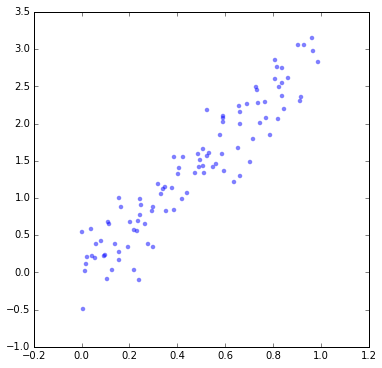

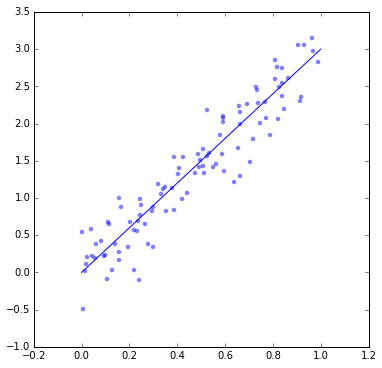

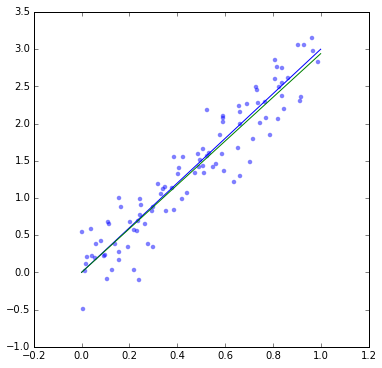

In [173]:
def plot_data(X, functions):
    plt.figure(figsize=(6, 6))
    plt.scatter(X.ravel(), y.ravel(), linewidth=0, alpha=0.5)
    for f in functions:
        plt.plot([0, 1], f.dot(np.array([[0, 1]])).ravel())        
    plt.show()

X = np.random.rand(100).reshape(1,100)
A = np.array([[3]])
y = (A.dot(X)).T + np.random.normal(size=(100, 1), scale=0.3)

solution = la.pinv(X).T.dot(y)

print A.ravel()
print solution.ravel()


plot_data(X, [])
plot_data(X, [A])
plot_data(X, [A, solution])


In [184]:
print dir(la)

['LinAlgError', 'Tester', '__builtins__', '__doc__', '__file__', '__name__', '__package__', '__path__', '_umath_linalg', 'absolute_import', 'bench', 'cholesky', 'cond', 'det', 'division', 'eig', 'eigh', 'eigvals', 'eigvalsh', 'info', 'inv', 'lapack_lite', 'linalg', 'lstsq', 'matrix_power', 'matrix_rank', 'norm', 'pinv', 'print_function', 'qr', 'slogdet', 'solve', 'svd', 'tensorinv', 'tensorsolve', 'test']
(1, 100) (100, 1)
(array([[ 2.94017638]]), array([ 8.87062881]), 1, array([ 5.4304806]))


In [193]:
print la.solve(X.dot(X.T), X.dot(y)) # AX = y --> X = solve(A, y)

[[ 2.94017638]]


In [194]:
print la.lstsq(X.T, y)

(array([[ 2.94017638]]), array([ 8.87062881]), 1, array([ 5.4304806]))


In [196]:
print la.qr(X.T.dot(X)) # Rozklad QR

(array([[ -7.80567688e-02,   2.88994842e-01,   9.19390418e-01, ...,
          -1.29786367e-03,   3.27304811e-04,  -1.05826786e-04],
        [ -9.33919338e-02,   2.50355899e-02,   1.88824411e-02, ...,
          -1.32794145e-02,  -1.67231018e-03,  -1.92355139e-03],
        [ -9.82608886e-02,   2.63408114e-02,  -3.77294526e-02, ...,
           1.65375441e-02,  -4.02265823e-03,  -1.72774987e-05],
        ..., 
        [ -1.45004406e-01,   2.30066965e-01,  -2.05382651e-02, ...,
           2.47394625e-02,  -8.67069126e-03,   9.42778868e-04],
        [ -1.22395324e-01,   3.28105330e-02,  -1.71470779e-02, ...,
          -3.65161514e-02,  -2.52841975e-03,   1.04006112e-04],
        [ -6.53917970e-02,  -7.80682167e-02,   3.67217877e-02, ...,
          -1.14752074e-02,   9.89763786e-03,   1.13658962e-03]]),
 array([[ -2.30190345e+00,  -2.75413930e+00,  -2.89772536e+00, ...,
          -4.27619728e+00,  -3.60945273e+00,  -1.92841191e+00],
        [  0.00000000e+00,  -2.90336953e-16,   1.08332209e-1

In [199]:
print la.cholesky(X.T.dot(X) + np.eye(100)) # Dekompozycja Choleskiego, rozklad Choleskiego

[[ 1.08613035  0.          0.         ...,  0.          0.          0.        ]
 [ 0.19793132  1.1036474   0.         ...,  0.          0.          0.        ]
 [ 0.2082504   0.20786068  1.09460439 ...,  0.          0.          0.        ]
 ..., 
 [ 0.30731683  0.30674172  0.2671509  ...,  1.01052518  0.          0.        ]
 [ 0.2594      0.25891456  0.22549674 ...,  0.01767566  1.00735509  0.        ]
 [ 0.13858889  0.13832954  0.12047549 ...,  0.00944352  0.00783047
   1.00207436]]


In [200]:
from scipy import optimize

f( 0.699999999784 )= -1.0


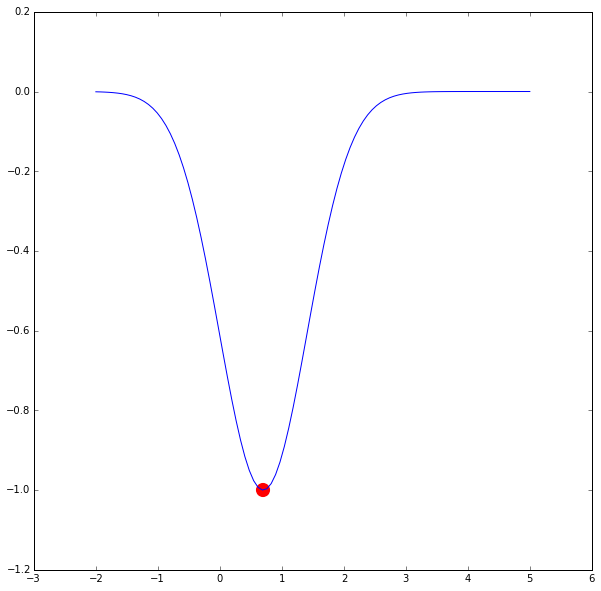

In [210]:
def f(x):
    return -np.exp(-(x-0.7)**2)

x_min = optimize.brent(f) 
print 'f(',x_min,')=', f(x_min)

x = np.linspace(-2, 5, 100)

plt.figure(figsize=(10,10))
plt.plot(x, f(x))
plt.scatter([x_min], [f(x_min)], c='red', s=200, linewidth=0)
plt.show()

In [217]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

x_min = optimize.fmin_cg(f, [2, 2])
print x_min

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 120
         Gradient evaluations: 30
[ 0.99998968  0.99997855]


In [219]:
def fprime(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

x_min = optimize.fmin_cg(f, [2, 2], fprime=fprime)
print x_min

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 30
         Gradient evaluations: 30
[ 0.99999199  0.99998336]


In [231]:
x_min = optimize.minimize(fun=f, x0=[2, 2], jac=fprime)
print x_min

   status: 0
  success: True
     njev: 24
     nfev: 24
 hess_inv: array([[ 0.98632014,  1.97824322],
       [ 1.97824322,  4.46512386]])
      fun: 1.9753570833042e-14
        x: array([ 1.00000017,  1.00000026])
  message: 'Optimization terminated successfully.'
      jac: array([  4.74186625e-07,  -1.53939016e-07])


In [237]:
x_min = optimize.minimize(fun=f, x0=[2, 2], jac=fprime, constraints=[{'type': 'eq', 'fun': lambda x : x[0]+x[1]}])
print x_min

  status: 0
 success: True
    njev: 8
    nfev: 10
     fun: 0.37623482510170186
       x: array([ 0.2213832, -0.2213832])
 message: 'Optimization terminated successfully.'
     jac: array([-0.5391743 , -0.54078743,  0.        ])
     nit: 8


In [238]:
x_min = optimize.minimize(fun=f, x0=[2, 2], constraints=[{'type': 'eq', 'fun': lambda x : x[0]+x[1]}])
print x_min

  status: 0
 success: True
    njev: 8
    nfev: 34
     fun: 0.37623482510046402
       x: array([ 0.2213832, -0.2213832])
 message: 'Optimization terminated successfully.'
     jac: array([-0.53917429, -0.54078741,  0.        ])
     nit: 8


[  0.98093106  11.59798564]


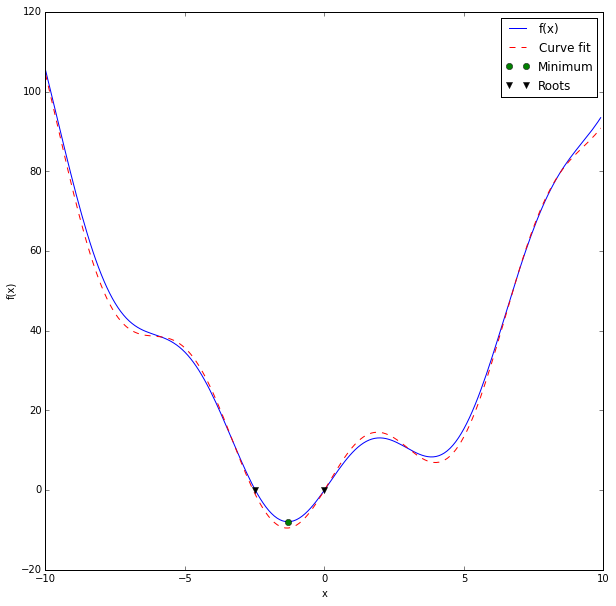

In [294]:

def f(x):
    return x**2 + 10*np.sin(x)

xmin = optimize.minimize(f, x0=np.array([np.random.normal()*10]))['x']
root = optimize.fsolve(f, 1)
root2 = optimize.fsolve(f, -2.5)

xdata = np.linspace(-10, 10, 10)
ydata = f(xdata) + np.random.normal(size=xdata.size, scale=10)

def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

params, params_covariance = optimize.curve_fit(f2, xdata, ydata)

print params
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
ax.plot(x, f2(x, *params), 'r--', label="Curve fit")

ax.plot(xmin, f(xmin), 'go', label="Minimum")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

